In [90]:
# Crossplot generation using lithologic algorithms [Python Porgramming Language] for Jaba Field, well 1. 
# Modified: 23/10/2021
# Created by: Fisayo Fagbemi
# Modified to determine Vsh, Sw, Rt and Swi
# Modified: 28/07/2022
# Well A

In [2]:
# Import required python libraries

import pandas as pd
import matplotlib.pyplot as plt
import lasio
import numpy as np

In [3]:
las = lasio.read("Well_A.las")

In [4]:
# Perform a smart review of dataset

df = las.df()
GRmin = 4.79
GRmax = 155.457
RHOBmin = 1.656100
RHOBmax = 2.674300
df['InvGR'] = 1 / df['GR']    # is there anything like this line?
# Are others correct?
df['GR_IGR'] = (df['GR'] - GRmin) / (GRmax - GRmin)
df['D_IGR'] = (df['RHOB'] - RHOBmin) / (RHOBmax - RHOBmin)
df['GR_VSHL'] = 0.083 * (2 * np.exp(2 * df['GR_IGR']) - 1)
df['D_VSHL'] = 0.083 * (2 * np.exp(2 * df['D_IGR']) - 1)
 # Density Porosity
Bulk_RHOB = 2.65
RHOB_FL_GAS = 0.74
RHOB_FL_OIL = 0.9
RHOB_FL_H2O = 1.0
RHOB = RHOB_FL_H2O  # Use for water
df['T_PORO'] = (Bulk_RHOB - df['RHOB']) / (Bulk_RHOB - RHOB)
 # Effective Porosity
df['E_PORO'] = (1 - df['GR_VSHL']) * df['T_PORO']
df.to_csv('rw_A_data.csv', index=True)
df.describe()

,RHOB,DT:1,DT:2,LLD,GR,InvGR,GR_IGR,D_IGR,GR_VSHL,D_VSHL,T_PORO,E_PORO
count,9778.000000,9793.000000,9806.000000,9791.000000,8637.000000,8637.000000,8637.000000,9778.000000,8637.000000,9778.000000,9778.000000,8637.000000
mean,2.257625,100.908346,104.355664,100.905400,62.192282,0.021111,0.380988,0.590773,0.297943,0.480712,0.237803,0.176435
std,0.145989,11.910640,447.387043,11.906195,27.883760,0.013359,0.185069,0.143380,0.143033,0.163906,0.088478,0.085286
min,1.656100,56.235400,0.790300,56.254800,4.790300,0.006433,0.000002,0.000000,0.083001,0.083000,-0.014727,-0.045357
25%,2.156425,92.353600,2.274725,92.354950,38.343800,0.011443,0.222702,0.491382,0.176146,0.360524,0.172848,0.102687
50%,2.241600,99.431700,6.123750,99.431500,59.883100,0.016699,0.365661,0.575034,0.261919,0.441296,0.247515,0.185598
75%,2.364800,108.217300,17.965950,108.218000,87.391700,0.026080,0.548240,0.696032,0.413939,0.584842,0.299136,0.239657
max,2.674300,146.176800,4244.920000,146.176000,155.457500,0.208755,1.000003,1.000000,1.143591,1.143583,0.602364,0.482840


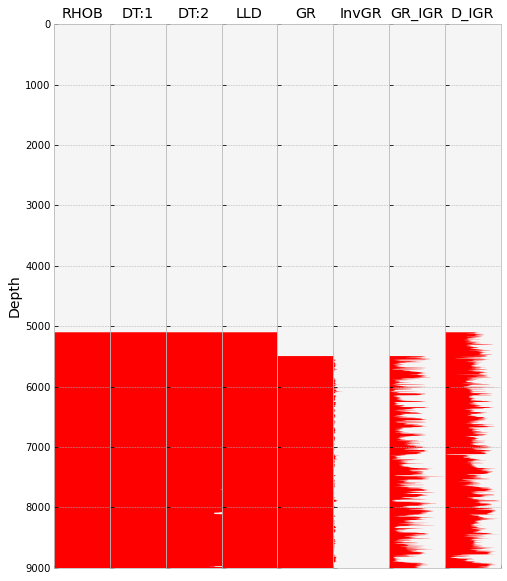

In [94]:
 fig = plt.subplots(figsize=(8,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,8), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,8), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,8), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,8), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,8), (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,8), (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,8), (0,6), rowspan=1, colspan = 1)
ax8 = plt.subplot2grid((1,8), (0,7), rowspan=1, colspan = 1)

columns = df.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

for i, ax in enumerate(axes):
        ax.plot(df.iloc[:,i], df.index, lw=0)
        ax.set_ylim(9000, 0)
        ax.set_xlim(0, 1)
        ax.set_title(columns[i])
        ax.set_facecolor('whitesmoke')
        ax.fill_betweenx(df.index, 0, df.iloc[:,i], facecolor='red')
        # Remove tick labels from each subplot
        if i > 0:
            plt.setp(ax.get_yticklabels(), visible = False)
        plt.setp(ax.get_xticklabels(), visible = False)

ax1.set_ylabel('Depth', fontsize=14)

plt.subplots_adjust(wspace=0)
plt.show()

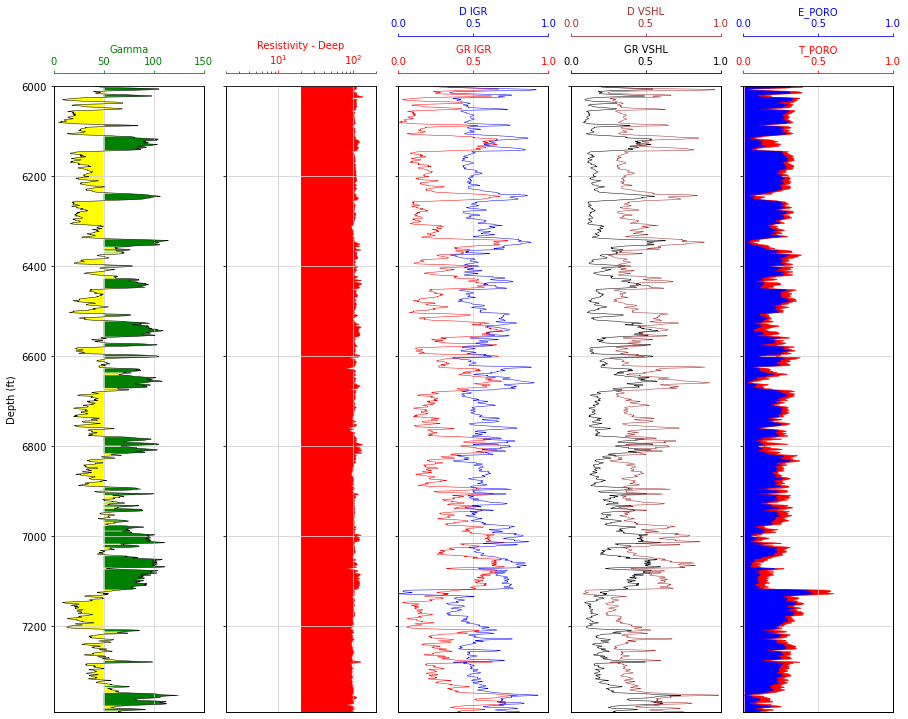

In [8]:
fig, ax = plt.subplots(figsize=(15,10))

#Set up the plot axes
ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,6), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax3 = plt.subplot2grid((1,6), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax4 = ax3.twiny()
ax5 = plt.subplot2grid((1,6), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax6 = ax5.twiny()
ax7 = plt.subplot2grid((1,6), (0,4), rowspan=1, colspan = 1, sharey = ax1)
ax8 = ax7.twiny()

#ax7 = ax2.twiny()

    # As our curve scales will be detached from the top of the track,
    # this code adds the top border back in without dealing with splines
ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax5.twiny()
ax13.xaxis.set_visible(False)
ax14 = ax7.twiny()
ax14.xaxis.set_visible(False)

    # Gamma Ray track
ax1.plot(df["GR"], df.index, color = "black", linewidth = 0.5)
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 150)
ax1.set_ylabel("Depth (ft)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.fill_betweenx(df.index, 50, df['GR'], where=df['GR']<=70, facecolor='yellow')
ax1.fill_betweenx(df.index, df['GR'], 50, where=df['GR']>=70, facecolor='green')
ax1.set_xticks([0, 50, 100, 150])

    # Resistivity track
ax2.plot(df["LLD"], df.index, color = "red", linewidth = 0.5)
ax2.set_xlabel("Resistivity - Deep")
ax2.set_xlim(2, 200)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
#ax2.fill_betweenx(df.index, 20, df["LLD"], facecolor='yellow')
ax2.fill_betweenx(df.index, 20, df['LLD'], where=df['LLD']<=20, facecolor='black')
ax2.fill_betweenx(df.index, df['LLD'], 20, where=df['LLD']>=20, facecolor='red')
ax2.set_xticks([2, 20, 200])
ax2.semilogx()

    # Gamma ray IGR track
ax3.plot(df["GR_IGR"], df.index, color = "red", linewidth = 0.5)
ax3.set_xlabel("GR IGR")
ax3.set_xlim(0, 1)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([0, 0.5, 1])

    # Density IGR track
ax4.plot(df["D_IGR"], df.index, color = "blue", linewidth = 0.5)
ax4.set_xlabel('D IGR')
ax4.xaxis.label.set_color("blue")
ax4.set_xlim(0, 1)
ax4.tick_params(axis='x', colors="blue")
ax4.spines["top"].set_position(("axes", 1.08))
ax4.spines["top"].set_visible(True)
ax4.spines["top"].set_edgecolor("blue")
ax4.set_xticks([0, 0.5, 1])

    # Gamma ray V-Shale (LaronovCorr) track
ax5.plot(df["GR_VSHL"], df.index, color = "black", linewidth = 0.5)
ax5.set_xlabel("GR VSHL")
ax5.set_xlim(0, 1)
ax5.xaxis.label.set_color("black")
ax5.tick_params(axis='x', colors="black")
ax5.spines["top"].set_edgecolor("black")
#ax5.fill_betweenx(df.index, 8.5, df["CAL"], facecolor='yellow')
#ax5.fill_betweenx(df.index, df['GR_VSHL'], 0.1, where=df['GR_VSHL']>=0.1, facecolor='black')
ax5.set_xticks([0, 0.5, 1])

    # Density V-Shale (LaronovCorr) track
ax6.plot(df["D_VSHL"], df.index, color = "brown", linewidth = 0.5)
ax6.set_xlabel("D VSHL")
ax6.set_xlim(0, 1)
ax6.xaxis.label.set_color("brown")
ax6.spines["top"].set_position(("axes", 1.08))
ax6.tick_params(axis='x', colors="brown")
ax6.spines["top"].set_visible(True)
ax6.spines["top"].set_edgecolor("brown")
#ax6.fill_betweenx(df.index, df['D_VSHL'], 1.5, where=df['D_VSHL']>=0.5, facecolor='brown')
ax6.set_xticks([0, 0.5, 1])

    # Total Porosity track
ax7.plot(df["T_PORO"], df.index, color = "red", linewidth = 0.5)
ax7.set_xlabel("T_PORO")
ax7.set_xlim(0, 1)
ax7.xaxis.label.set_color("red")
ax7.tick_params(axis='x', colors="red")
ax7.spines["top"].set_edgecolor("red")
ax7.fill_betweenx(df.index, df['T_PORO'], 0.01, where=df['T_PORO']>=0.01, facecolor='red')
ax7.set_xticks([0, 0.5, 1])

    # Eff Porosity track
ax8.plot(df["E_PORO"], df.index, color = "blue", linewidth = 0.5)
ax8.set_xlabel("E_PORO")
ax8.set_xlim(0, 1)
ax8.xaxis.label.set_color("blue")
ax8.spines["top"].set_position(("axes", 1.08))
ax8.spines["top"].set_visible(True)
ax8.tick_params(axis='x', colors="blue")
ax8.spines["top"].set_edgecolor("blue")
ax8.fill_betweenx(df.index, df['E_PORO'], 0.01, where=df['E_PORO']>=0.01, facecolor='blue')
ax8.set_xticks([0, 0.5, 1])

    # Common functions for setting up the plot can be extracted into
    # a for loop. This saves repeating code.
for ax in [ax1, ax2, ax3, ax5, ax7]:
    ax.set_ylim(7390, 5999)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))      
        
for ax in [ax2, ax3, ax5, ax7]:
    plt.setp(ax.get_yticklabels(), visible = False)
        
plt.tight_layout()
fig.subplots_adjust(wspace = 0.15)
plt.show()

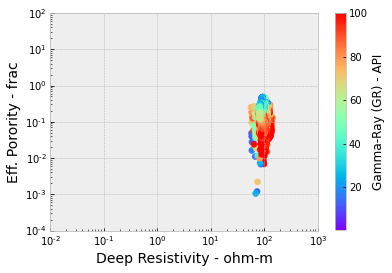

In [103]:
# Perform, NPHI-RHOB (Normal vs Log scale)

plt.style.use('bmh')

plt.scatter(y = 'E_PORO', x = 'LLD', data = df, c ='GR', vmin = 0.0001, vmax = 100, cmap = 'rainbow')

plt.xlim(0.01, 1000)
plt.ylim(0.0001, 100)

plt.ylabel('Eff. Porority - frac', fontsize=14)

plt.xlabel('Deep Resistivity - ohm-m', fontsize=14)

plt.colorbar(label='Gamma-Ray (GR) - API')
plt.xscale('log')
plt.yscale('log')

plt.show()

In [105]:
# Pickett Plot
df2 = df.reset_index()
df2.to_csv('rw_A_data.csv', index=True)

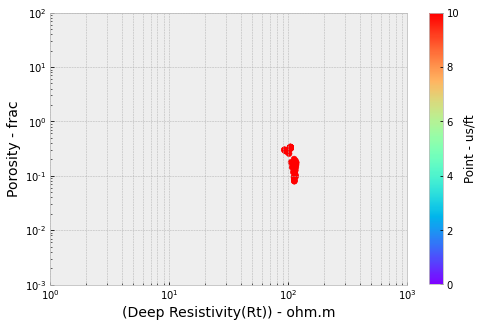

In [106]:
df2 = pd.read_csv("rw_A_data.csv")             # read a .csv file in as a DataFrame
df21 = df2.loc[2269:2328]   # The index range for the reservoir sands  6035:6045 ft (in m)
plt.style.use('bmh')
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
plt.scatter(x = 'LLD', y = 'T_PORO', data = df21, c = 'POINT', vmin = 0, vmax = 10, cmap = 'rainbow')
plt.xlim(1, 1000)
plt.xscale('log')
plt.ylim(.001, 100)
plt.yscale('log')
plt.xlabel('(Deep Resistivity(Rt)) - ohm.m', fontsize=14)
plt.ylabel('Porosity - frac', fontsize=14)
plt.colorbar(label='Point - us/ft')
plt.grid(True, which='both', axis='x')

plt.show()

In [65]:
df21

,POINT,DEPT,RHOB,DT:1,DT:2,LLD,GR,InvGR,GR_IGR,D_IGR,GR_VSHL,D_VSHL,T_PORO,E_PORO
2269,2269,6134.5,2.3152,112.4665,3.4525,112.4650,91.1968,0.010965,0.573495,0.647319,1.748143,2.078784,0.202909,-0.151805
2270,2270,6135.0,2.3369,115.2993,3.5940,115.2990,92.1074,0.010857,0.579539,0.668631,1.773416,2.183676,0.189758,-0.146761
2271,2271,6135.5,2.3612,117.1406,3.6836,117.1390,92.7954,0.010776,0.584105,0.692497,1.792714,2.306567,0.175030,-0.138749
2272,2272,6136.0,2.3864,116.7157,3.7954,116.7160,91.9512,0.010875,0.578502,0.717246,1.769059,2.440359,0.159758,-0.122863
2273,2273,6136.5,2.4122,116.2231,3.9618,116.2230,90.2637,0.011079,0.567302,0.742585,1.722562,2.584372,0.144121,-0.104136
2274,2274,6137.0,2.4418,115.0160,4.0073,115.0160,89.4551,0.011179,0.561935,0.771656,1.700648,2.758842,0.126182,-0.088409
2275,2275,6137.5,2.4611,113.8829,4.1035,113.8840,86.1328,0.011610,0.539885,0.790611,1.613040,2.878188,0.114485,-0.070184
2276,2276,6138.0,2.4798,115.2993,4.3024,115.2990,83.5586,0.011968,0.522799,0.808977,1.547767,2.998221,0.103152,-0.056503
2277,2277,6138.5,2.4900,115.7242,4.5170,115.7220,82.3203,0.012148,0.514580,0.818994,1.517153,3.065575,0.096970,-0.050148
2278,2278,6139.0,2.4961,112.8914,4.7321,112.8880,83.0801,0.012037,0.519623,0.824985,1.535877,3.106505,0.093273,-0.049983


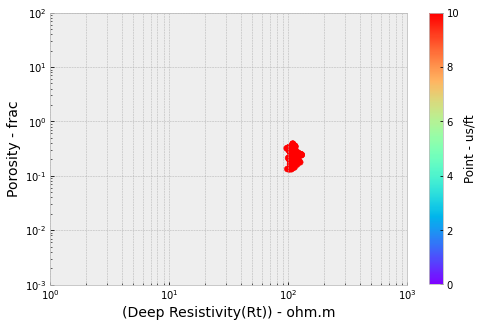

In [72]:
df2 = pd.read_csv("rw_A_data.csv")             # read a .csv file in as a DataFrame
df21 = df2.loc[2728:2888]   # The index range for the reservoir sands  6035:6045 ft (in m)
plt.style.use('bmh')
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
plt.scatter(x = 'LLD', y = 'T_PORO', data = df21, c = 'POINT', vmin = 0, vmax = 10, cmap = 'rainbow')
plt.xlim(1, 1000)
plt.xscale('log')
plt.ylim(.001, 100)
plt.yscale('log')
plt.xlabel('(Deep Resistivity(Rt)) - ohm.m', fontsize=14)
plt.ylabel('Porosity - frac', fontsize=14)
plt.colorbar(label='Point - us/ft')
plt.grid(True, which='both', axis='x')

plt.show()

In [69]:
df21

,POINT,DEPT,RHOB,DT:1,DT:2,LLD,GR,InvGR,GR_IGR,D_IGR,GR_VSHL,D_VSHL,T_PORO,E_PORO
3626,3626,6813.0,2.2519,117.2322,2.1223,117.228,91.1562,0.010970,0.573226,0.585150,1.747024,1.797154,0.241273,-0.180236
3627,3627,6813.5,2.2438,120.0655,2.3424,120.065,91.2461,0.010959,0.573822,0.577195,1.749504,1.763578,0.246182,-0.184514
3628,3628,6814.0,2.2482,124.0316,2.5575,124.029,88.1719,0.011341,0.553418,0.581516,1.666352,1.781751,0.243515,-0.162267
3629,3629,6814.5,2.2560,127.5730,2.6885,127.578,81.4297,0.012281,0.508669,0.589177,1.495444,1.814354,0.238788,-0.118306
3630,3630,6815.0,2.2641,130.4062,2.9097,130.390,75.3008,0.013280,0.467991,0.597132,1.352813,1.848745,0.233879,-0.082515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,3684,6842.0,2.1690,100.4440,91.3801,100.444,30.3594,0.032939,0.169708,0.503732,0.596724,1.477507,0.291515,0.117561
3685,3685,6842.5,2.1797,100.5912,82.1228,100.591,31.1250,0.032129,0.174789,0.514241,0.606190,1.515899,0.285030,0.112248
3686,3686,6843.0,2.1940,100.6843,73.1370,100.684,30.8867,0.032376,0.173208,0.528285,0.603234,1.568483,0.276364,0.109652
3687,3687,6843.5,2.2078,100.9683,64.4863,100.968,32.0723,0.031180,0.181077,0.541839,0.618037,1.620648,0.268000,0.102366


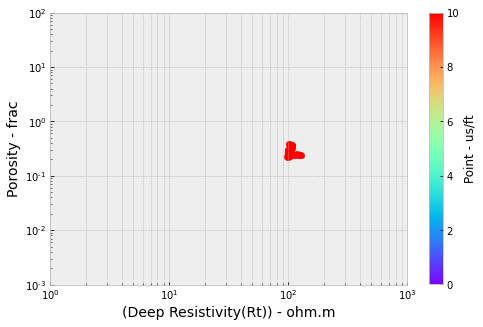

In [73]:
df2 = pd.read_csv("rw_A_data.csv")             # read a .csv file in as a DataFrame
df21 = df2.loc[3626:3688]   # The index range for the reservoir sands  6035:6045 ft (in m)
plt.style.use('bmh')
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)
plt.scatter(x = 'LLD', y = 'T_PORO', data = df21, c = 'POINT', vmin = 0, vmax = 10, cmap = 'rainbow')
plt.xlim(1, 1000)
plt.xscale('log')
plt.ylim(.001, 100)
plt.yscale('log')
plt.xlabel('(Deep Resistivity(Rt)) - ohm.m', fontsize=14)
plt.ylabel('Porosity - frac', fontsize=14)
plt.colorbar(label='Point - us/ft')
plt.grid(True, which='both', axis='x')

plt.show()